# Perceptron Algorithm

## Imports, Configurations and Setup

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as matcol
import matplotlib.patches as patches
import seaborn as sb
            
# Configuration
%matplotlib inline
%config InlineBackend.figure_format='retina'
sb.set(style='ticks')

# Print options
np.set_printoptions(linewidth=160)

color_blue: #4c72b0
color_orange: #dd8452
color_green: #55a868
color_red: #c44e52
color_purple: #8172b3
color_brown: #937860
color_pink: #da8bc3
color_grey: #8c8c8c
color_yellow: #ccb974
color_aqua: #64b5cd
color_black: #000000
color_white: #ffffff


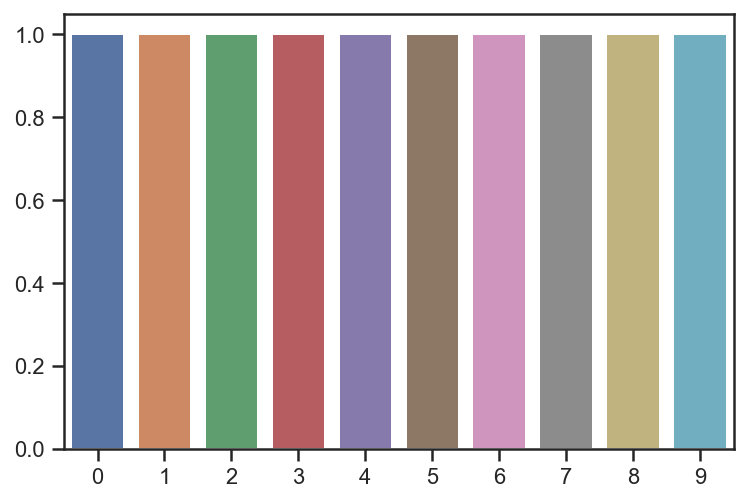

In [3]:
# Set color vars
color_blue = sb.color_palette(palette='deep')[0]
color_orange = sb.color_palette(palette='deep')[1]
color_green = sb.color_palette(palette='deep')[2]
color_red = sb.color_palette(palette='deep')[3]
color_purple = sb.color_palette(palette='deep')[4]
color_brown = sb.color_palette(palette='deep')[5]
color_pink = sb.color_palette(palette='deep')[6]
color_grey = sb.color_palette(palette='deep')[7]
color_yellow = sb.color_palette(palette='deep')[8]
color_aqua = sb.color_palette(palette='deep')[9]
color_black = (0, 0, 0)
color_white = (1, 1, 1)

print('color_blue: {}'.format(matcol.to_hex(color_blue)))
print('color_orange: {}'.format(matcol.to_hex(color_orange)))
print('color_green: {}'.format(matcol.to_hex(color_green)))
print('color_red: {}'.format(matcol.to_hex(color_red)))
print('color_purple: {}'.format(matcol.to_hex(color_purple)))
print('color_brown: {}'.format(matcol.to_hex(color_brown)))
print('color_pink: {}'.format(matcol.to_hex(color_pink)))
print('color_grey: {}'.format(matcol.to_hex(color_grey)))
print('color_yellow: {}'.format(matcol.to_hex(color_yellow)))
print('color_aqua: {}'.format(matcol.to_hex(color_aqua)))
print('color_black: {}'.format(matcol.to_hex(color_black)))
print('color_white: {}'.format(matcol.to_hex(color_white)))

sb.barplot(x=np.arange(0,10), y=[1] * 10, palette='deep');

## Overview

The perceptron algorithm is a form of supervised learning which is used for **binary classifiers**. It is heavily used in deep learning, as it forms the basis for **neural networks**. Binary classification typically concerns yes/no type of questions, like: 
- Did the student pass the exam?
- Did the patient recover? 
- Did the online shop visitor convert?

A simple example with a variable $x_1$ and a variable $x_2$ is plotted in the below graph. The **label** $y$ is depicted by the color of the dots, $\color{#4c72b0}{\textbf{blue}}$ and $\color{#c44e52}{\textbf{red}}$. What we are typically trying to achieve with binary classifier algorithms is to find the line which best divides the two classification outcomes (e.g. the $\color{#8172b3}{\textbf{purple}}$ line below).

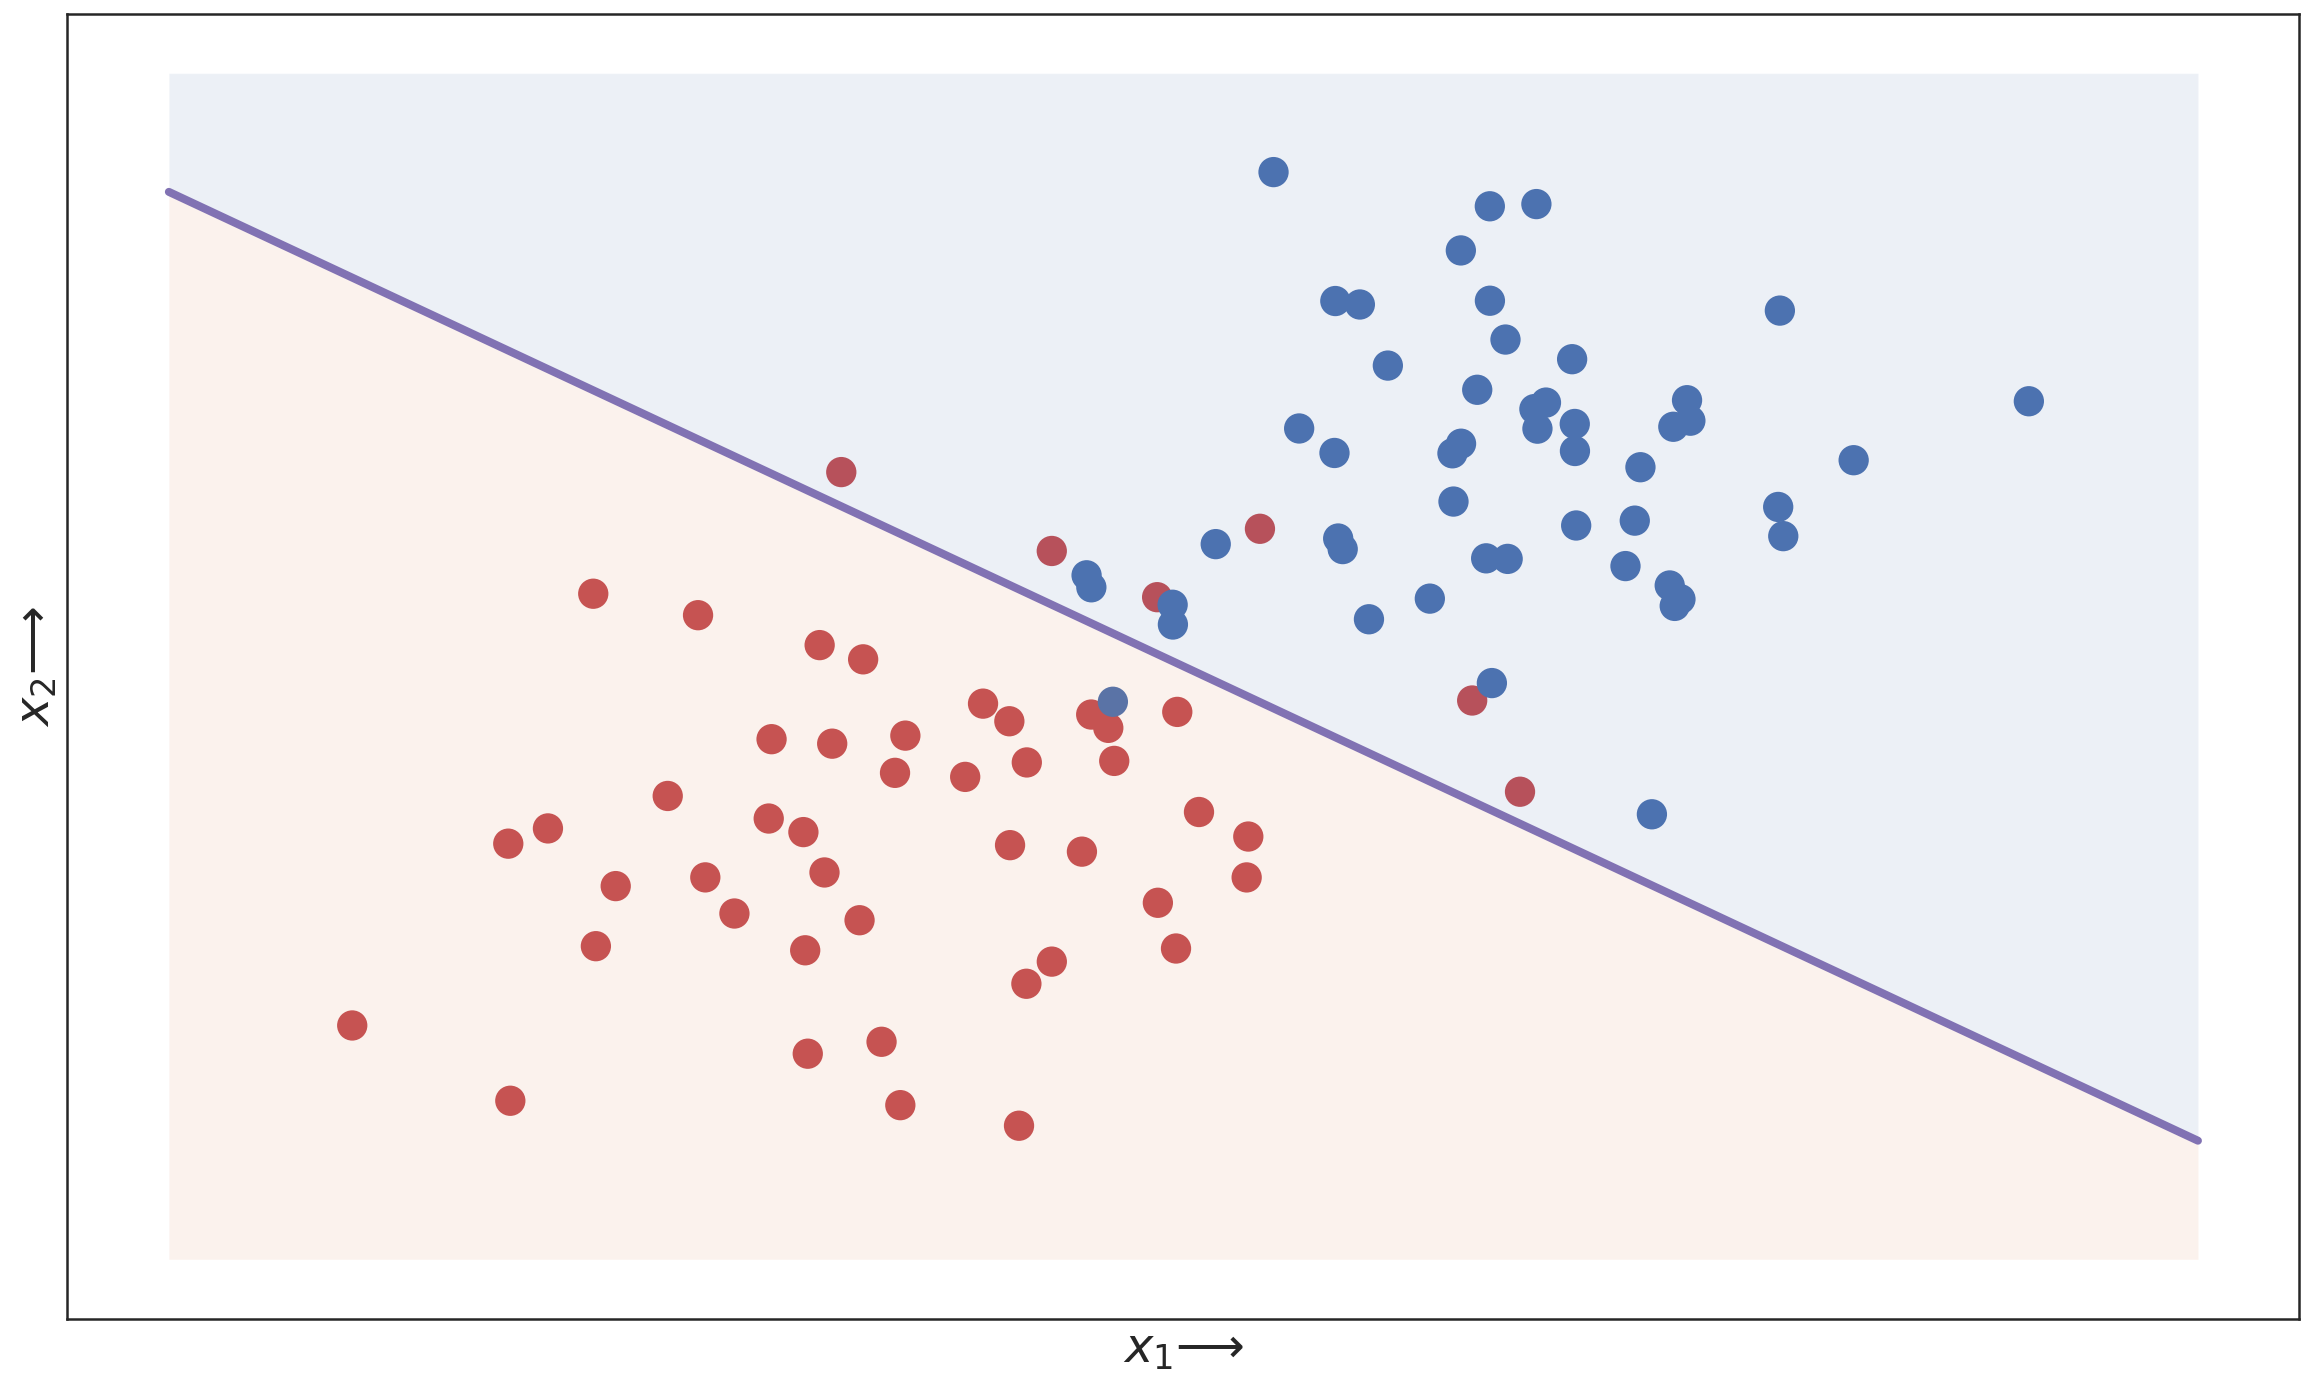

In [14]:
# Load data
df = pd.read_csv('data/perceptrons_data.csv')

# Assign columns to variables
x1 = df.iloc[:, 0]
x2 = df.iloc[:, 1]
y = df.iloc[:, 2]

# Draw plot
x_line = np.arange(-0.1, 1.11, 0.1)
plt.figure(figsize=[20, 12])
plt.scatter(x1, x2, c=y, s=200, cmap=matcol.ListedColormap([color_blue, color_red]))
plt.plot(x_line, x_line * -0.8 + 0.9, color=color_purple, linewidth=4)
plt.fill_between(x_line, x_line * -0.8 + 0.9, 1.1, alpha=0.1)
plt.fill_between(x_line, x_line * -0.8 + 0.9, -0.1, alpha=0.1)

# Set x and y labels
plt.xlabel('$x_1 ⟶$', fontsize=24)
plt.ylabel('$x_2 ⟶$', fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False);

### Boundary Line

In binary classification, the line which best divides the points in a dataset considering label $y$ is called the boundary line. The goal of a binary classification algorithm is to find the optimal boundary line.

If we again take the simple example of two variables $x_1$ and $x_2$ and the label $y$ then the **boundary line** will be depicted by the formula:

$w_1x_1 + w_2x_2 + b = 0$

Or abbreviated in **vector notation**:

$Wx + b = 0 \text{, where:} \\ 
W = (w_1, w_2) \\ 
x = (x_1, x_2)$

The **label** we refer to as:

$y = \text{label: }0 \text{ or } 1$

And the **prediction** would be:

$\hat{y} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } Wx + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } Wx + b < 0
    \end{array}
\right.$


#### Higher Dimensions

Extrapolating the above 2-dimensional example to higher dimensions, will make it impossible to visualize, like we did with the line example above, but it doesn't change much when it comes to the math involved. Instead of dealing with 2-dimensional space: $x_1$ and $x_2$, we would be dealing with n-dimensional space: $x_1, x_2, \ldots , x_n$

The **boundary** would be described by an $n-1$-dimensional hyperplane:

$w_1x_1 + w_2x_2 + \ldots + w_nx_n + b = 0$

This wouldn't change the **vector notation**:

$Wx + b = 0 \text{, where:} \\ 
W = (w_1, w_2, \ldots, w_n ) \\ 
x = (x_1, x_2, \ldots, x_n)$

The **label** we still refer to as:

$y = \text{label: }0 \text{ or } 1$

And the **prediction** would still be:

$\hat{y} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } Wx + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } Wx + b < 0
    \end{array}
\right.$


```{note}
As $Wx + b$ needs to evaluate to a single value, the vector dimensions for this formula will be as follows: $W: (1 \times n), x: (n \times 1), b: (1 \times 1)$
```

### Single Layer Perceptron

The *Single Layer Perceptron* is the simplest form of a neural network and can be used for **linear** binary classification. It receives a number of inputs which are evaluated by a **linear function** (or *transfer function*). This function will return a numeric value which the **step function** (or *activation function*) will interpret to derive a binary label, using a predefined **threshold**.

+++ 
![Perceptrons](assets/perceptron.png)

Here the *linear function* would be of the form:

$Wx + b \text{, where:} \\ 
W = (w_1, w_2, \ldots, w_n ) \\ 
x = (x_1, x_2, \ldots, x_n)$

The *step function* would be predicting the label using a *threshold*:

$\color{#4c72b0}{\textbf{1}} \text{ if } \geq 0 \\
\color{#c44e52}{\textbf{0}} \text{ if } < 0$


```{note}
The bias $\color{#da8bc3}{b}$ is sometimes depicted inside the **Linear Function** node, instead of as a separate input.
```

```{note}
Although Single Layer Perceptrons can only be used for **linear** classification, Multi Layer Perceptrons can also learn non-linearly separable patterns.
```

### Perceptrons as Logical Operators

An interesting fact about perceptrons is that they can also be used to model some logical operators. This can be achieved by choosing the weights of the inputs in such a way that the boundary line will split the outputs in the way expected for the respective logical operator, for each of the possible input combinations for $x_1$ and $x_2$ (having $0$ or $1$ values).

#### Logical AND Operator

```{figure} assets/perceptron_logical_and.png
:name: Perceptron Logical AND
:class: full-width
```

##### Configuring the Weights

```{margin}
![Perceptron - Logical AND - Truth Table](assets/perceptron_logical_and_table.png)
```

The **logical AND operator** should behave as depicted in the *Logical Truth Table* which can be achieved picking the right weights for the boundary line. If we consider the following formula, the below weights would result in he expeced output:

$\text{output} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } w_1x_1 + w_2x_2 + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } w_1x_1 + w_2x_2 + b < 0
    \end{array}
\right.$

$w_1 = 0.5, w_2 = 0.5, b = -1$

```{note}
:class: full-width
The weights which are chosen in below section are just one of the options which could work for the weights, to get the expected behavior for this operator. There are multiple combinations of weights possible which lead to the same result.
```

#### Logical OR Operator

```{admonition} TODO
:class: tip
Add diagrams and weights for OR, NOT, XOR
```

### Fitting the Boundary Line

```{admonition} TODO
:class: tip
Add section about how the steps are made to adjust the boundary line and add a plot which shows the steps
```